<>:89: SyntaxWarning:

invalid escape sequence '\E'

<>:89: SyntaxWarning:

invalid escape sequence '\E'

/tmp/ipykernel_9885/3353643857.py:89: SyntaxWarning:

invalid escape sequence '\E'



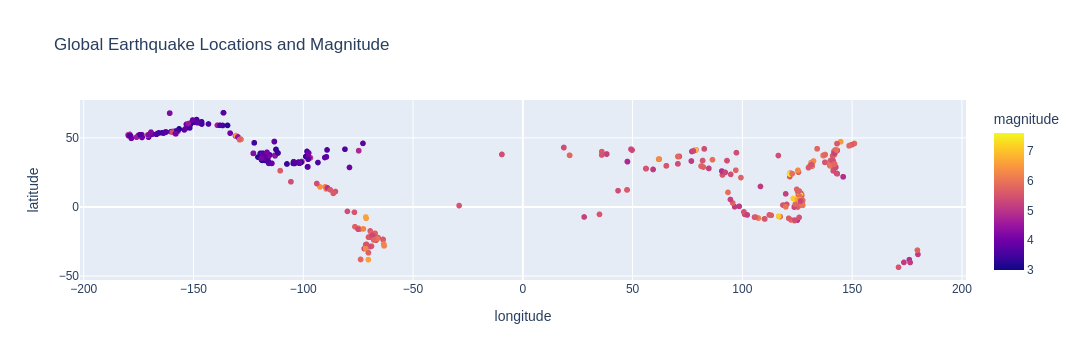

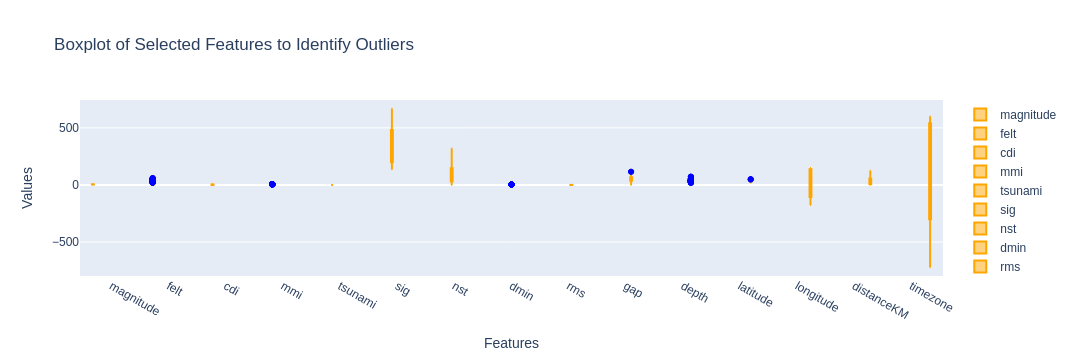

Covariance Matrix : [[ 1.00186916e+00  1.47843107e-01  2.18912384e-01  3.84038561e-01
   0.00000000e+00  9.92322745e-01  7.96090574e-01  6.78440816e-01
   7.42320961e-01 -3.77475106e-01  4.96043784e-01 -1.57404630e-01
   9.58883782e-01 -1.56240709e-01  9.54898847e-01]
 [ 1.47843107e-01  1.00186916e+00  6.22914985e-01  2.41857513e-01
   0.00000000e+00  1.85263374e-01  7.47013903e-02 -1.61627555e-01
   1.26416697e-01 -1.52049658e-01  1.59027553e-01 -5.30234556e-02
   5.06198315e-02 -5.40181259e-02  3.28870419e-02]
 [ 2.18912384e-01  6.22914985e-01  1.00186916e+00  4.83325793e-01
   0.00000000e+00  2.43615042e-01  1.11334720e-01 -1.84769273e-01
   1.52026170e-01 -1.66722153e-01  2.25613833e-01  1.27673955e-01
   9.56254313e-02  6.24145704e-02  8.82570142e-02]
 [ 3.84038561e-01  2.41857513e-01  4.83325793e-01  1.00186916e+00
   0.00000000e+00  4.09374491e-01  2.53715854e-01 -7.12716813e-02
   2.57599976e-01 -2.05207970e-01  7.33718185e-04 -4.81983927e-02
   2.94719724e-01  1.88022167e-01  

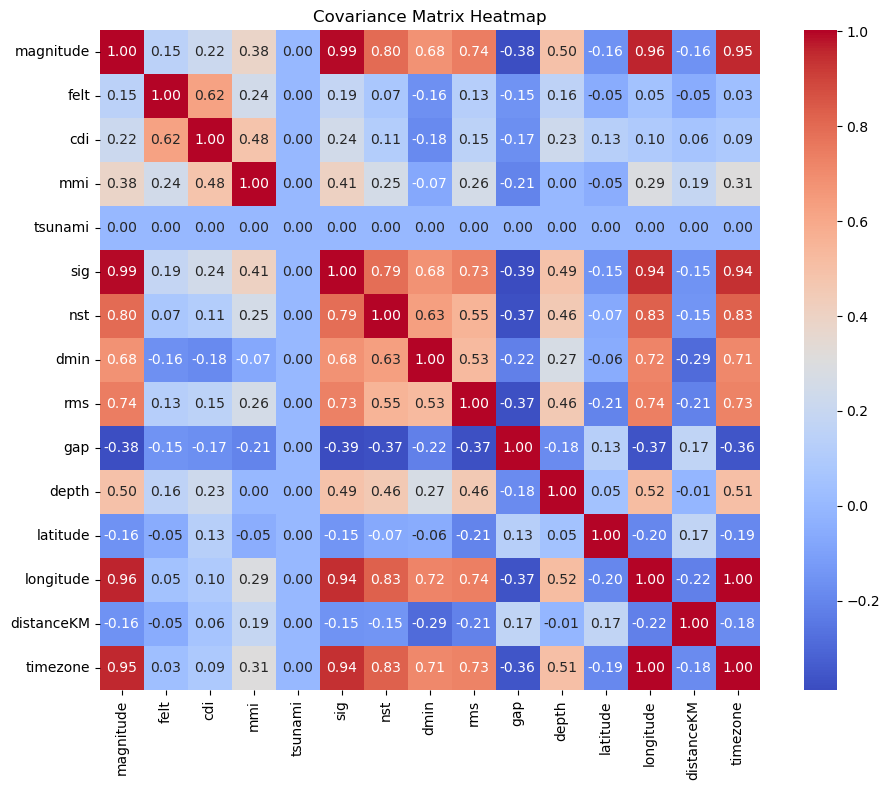

\Explained_Variance_Ratio of Principal Component : [0.45967534 0.14707267 0.08708585 0.07506089]


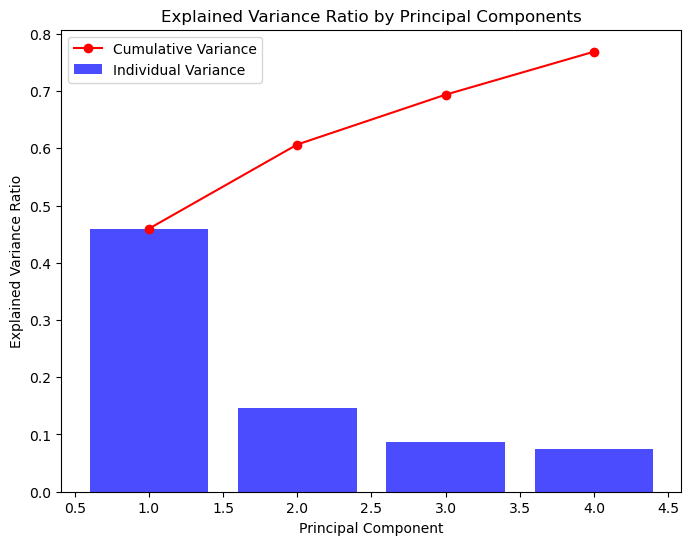


Correlation with PCA_Component_1 and Original features
longitude     0.383407
magnitude     0.382986
sig           0.381235
timezone      0.380494
nst           0.335031
rms           0.315053
dmin          0.282572
depth         0.220330
mmi           0.139516
cdi           0.082795
felt          0.061517
tsunami      -0.000000
latitude     -0.072755
distanceKM   -0.088819
gap          -0.181721
Name: PCA_Component_1, dtype: float64

Correlation with PCA_Component_2 and Original features
cdi           6.011371e-01
felt          5.109857e-01
mmi           4.291044e-01
distanceKM    2.033135e-01
latitude      9.355959e-02
depth         6.747112e-02
sig           4.318990e-02
magnitude     1.803730e-02
tsunami       2.220446e-16
rms          -2.767035e-03
nst          -4.814556e-02
timezone     -7.915478e-02
longitude    -8.115243e-02
gap          -9.971024e-02
dmin         -3.338344e-01
Name: PCA_Component_2, dtype: float64

Correlation with PCA_Component_3 and Original features
latitu

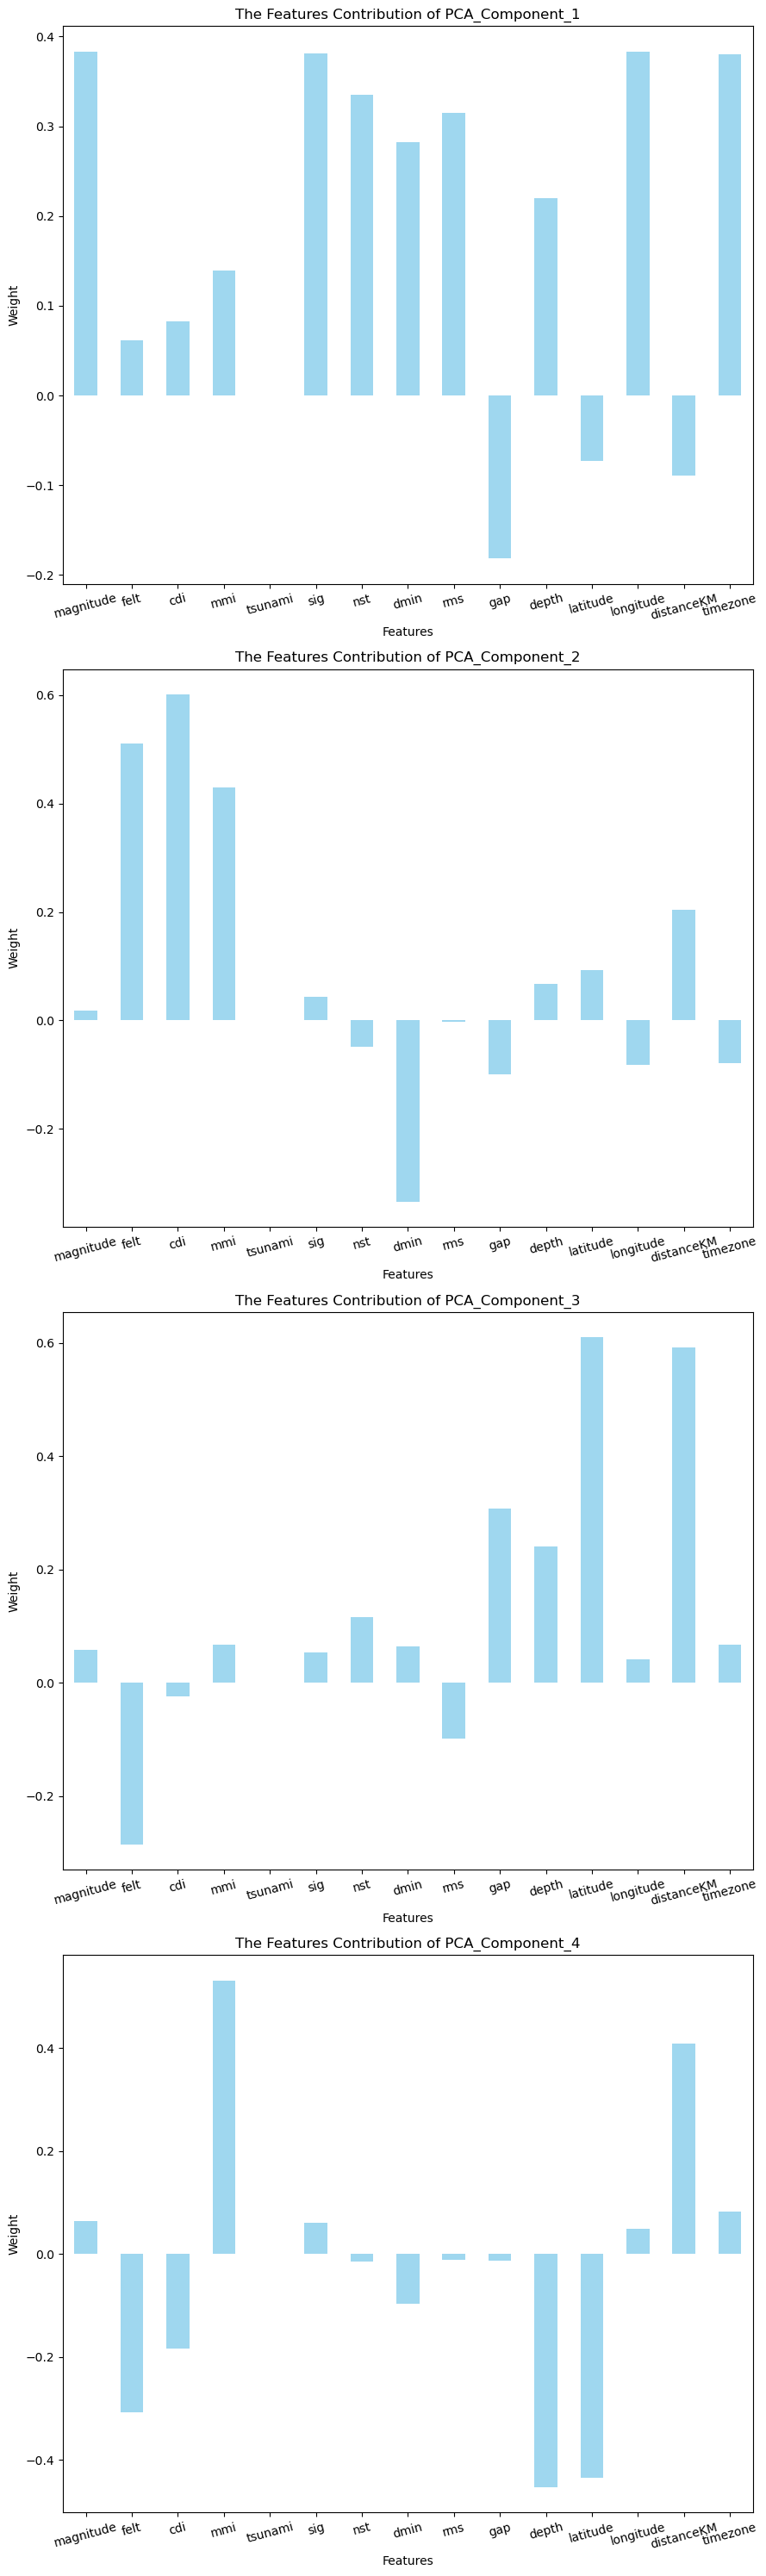

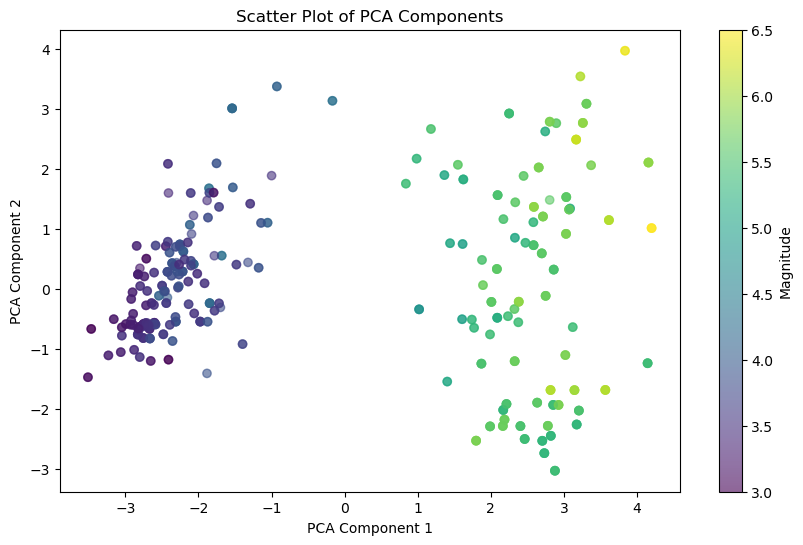

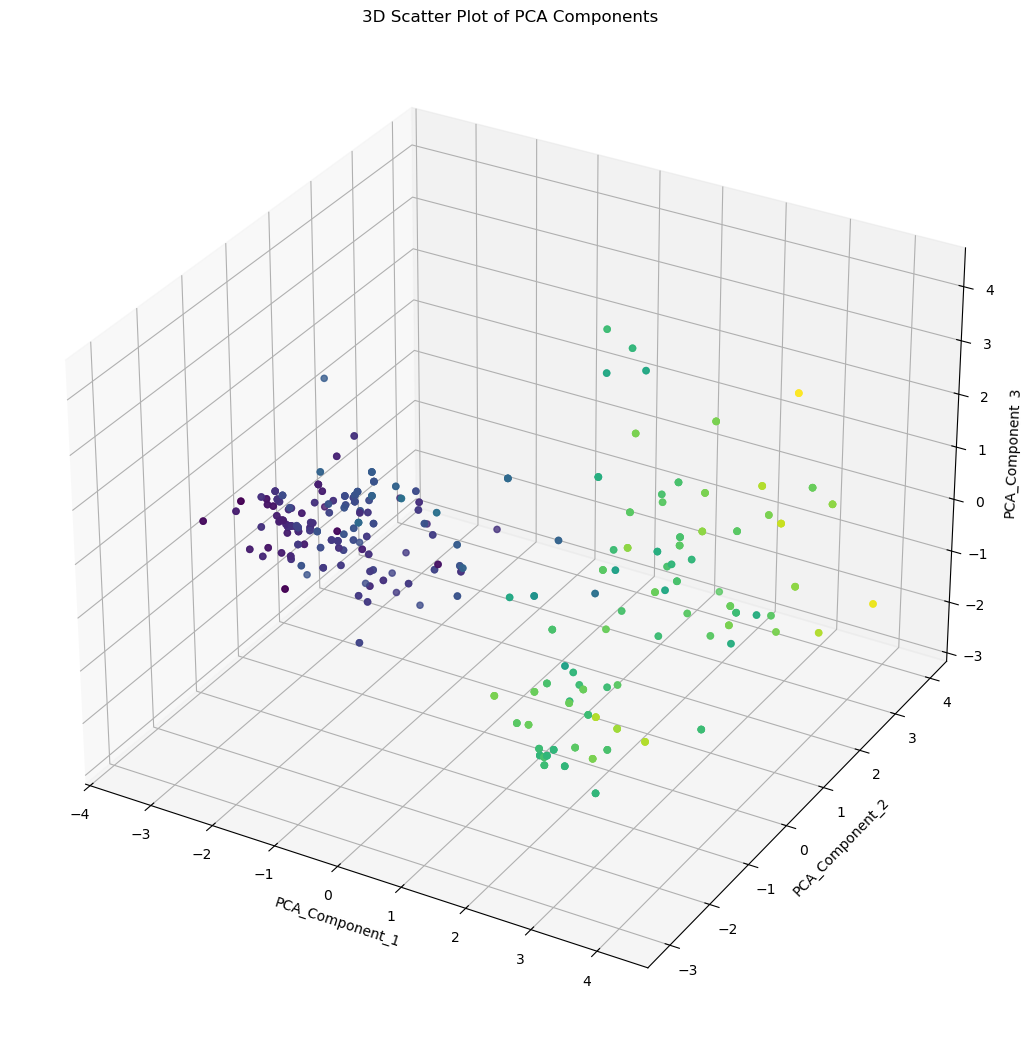

Root Mean Sqaured Error(RMSE) : 0.20976424558825735


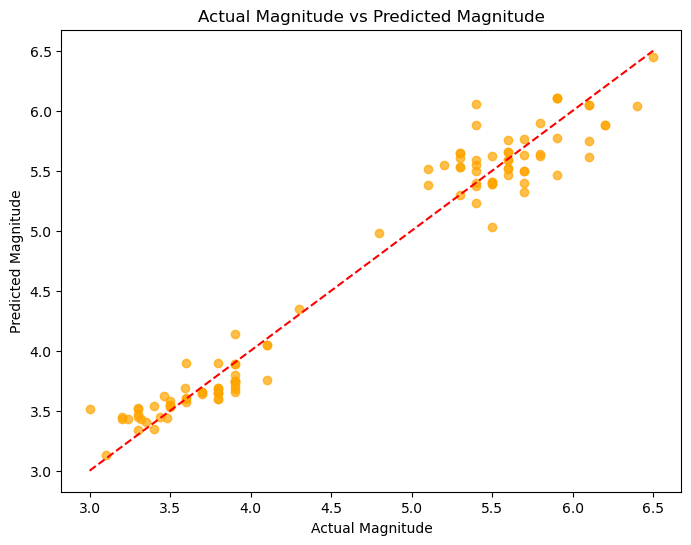

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

earthquakes_df = pd.read_csv('/home/avgenius/Downloads/earthquakes.csv')

fig = px.scatter(earthquakes_df, x='longitude', y='latitude', color='magnitude',
                 hover_data = ['place', 'depth', 'alert', 'tsunami', 'continent', 'country'],
                 title = 'Global Earthquake Locations and Magnitude')

fig.show()

columns_to_plot = ['magnitude', 'felt', 'cdi', 'mmi', 'tsunami', 'sig', 'nst','dmin',
                   'rms', 'gap', 'depth', 'latitude', 'longitude', 'distanceKM', 'timezone']

# Searching for outliers and removing them
def remove_outliers(earthquakes_df, column):
    Q1 = earthquakes_df[column].quantile(0.25)
    Q3 = earthquakes_df[column].quantile(0.75)
    IQR = Q3- Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return earthquakes_df[(earthquakes_df[column] >= lower_bound)
    & (earthquakes_df[column] <= upper_bound)]

for col in columns_to_plot:
    earthquakes_df = remove_outliers(earthquakes_df, col)

fig = go.Figure()

for col in columns_to_plot:
    fig.add_trace(go.Box(
        y=earthquakes_df[col],
        name=col,
        boxpoints='outliers',
        marker=dict(color='blue'),
        line=dict(color='orange')
    ))
fig.update_layout(
    title = 'Boxplot of Selected Features to Identify Outliers',
    yaxis_title = 'Values',
    xaxis_title='Features',
    boxmode='group'
)

fig.show()

# PCA
features = earthquakes_df[['magnitude', 'felt', 'cdi', 'mmi', 'tsunami', 'sig', 'nst','dmin',
                           'rms', 'gap', 'depth', 'latitude', 'longitude', 'distanceKM', 'timezone']]
# print(features.head())
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

cov_matrix = np.cov(data_scaled.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print('Covariance Matrix :', cov_matrix)    #cov_matrix.shape=(15, 15)
print('\nEigen Values :', eigen_values)
print('\nEigen Vectors :', eigen_vectors)

explained_variance_ratio = eigen_values / sum(eigen_values)

eigen_info = pd.DataFrame({
    'Eigen Value' : eigen_values,
    'Explained_Variance_Ratio' : explained_variance_ratio}).sort_values(by='Eigen Value', ascending=False)

eigen_info.reset_index(drop=True, inplace=True)
print('\n', eigen_info)

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=features.columns, yticklabels=features.columns, square=True)
plt.title('Covariance Matrix Heatmap')
plt.tight_layout()
plt.show()

pca = PCA(n_components=4)
principal_components = pca.fit_transform(data_scaled)
print('\Explained_Variance_Ratio of Principal Component :', pca.explained_variance_ratio_)

earthquakes_df['PCA_Component_1'] = principal_components[:, 0]
earthquakes_df['PCA_Component_2'] = principal_components[:, 1]
earthquakes_df['PCA_Component_3'] = principal_components[:, 2]
earthquakes_df['PCA_Component_4'] = principal_components[:, 3]

# Explained variance ratio plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, 5), pca.explained_variance_ratio_[:5], alpha=0.7, color='blue', label='Individual Variance')
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_[:5]), color='red', marker='o', label='Cumulative Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

# Correlation analysis with principal components and original features
loadings = pd.DataFrame(pca.components_.T, columns=[f'PCA_Component_{i+1}' for i in range(pca.n_components_)], index=features.columns)
print('\nCorrelation with PCA_Component_1 and Original features')
print(loadings['PCA_Component_1'].sort_values(ascending=False))
print('\nCorrelation with PCA_Component_2 and Original features') 
print(loadings['PCA_Component_2'].sort_values(ascending=False))
print('\nCorrelation with PCA_Component_3 and Original features') 
print(loadings['PCA_Component_3'].sort_values(ascending=False))
print('\nCorrelation with PCA_Component_4 and Original features') 
print(loadings['PCA_Component_4'].sort_values(ascending=False))

plt.figure(figsize=(9, 30))
for i in range(1, 5):
    plt.subplot(4, 1, i)
    loadings[f'PCA_Component_{i}'].plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'The Features Contribution of PCA_Component_{i}')
    plt.xlabel('Features')
    plt.ylabel('Weight')
    plt.xticks(rotation=15)
    plt.tight_layout()

plt.show()

# 2D scatter plot for PCA
plt.figure(figsize=(10, 6))
plt.scatter(earthquakes_df['PCA_Component_1'], earthquakes_df['PCA_Component_2'], alpha=0.6, c=earthquakes_df['magnitude'], cmap='viridis')
plt.colorbar(label='Magnitude')
plt.title('Scatter Plot of PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 3D scatter plot for PCA
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],
           c=earthquakes_df['magnitude'], cmap='viridis', alpha=0.8)
ax.set_xlabel('PCA_Component_1')
ax.set_ylabel('PCA_Component_2')
ax.set_zlabel('PCA_Component_3')
plt.title('3D Scatter Plot of PCA Components')
plt.show()

# Predicting the magnitude of earthquake using regression method(Linear Regression)
X = earthquakes_df[['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3', 'PCA_Component_4']]
y = earthquakes_df['magnitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Sqaured Error(RMSE) : {rmse}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual Magnitude vs Predicted Magnitude')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.show()

Minimum depth value: -0.25


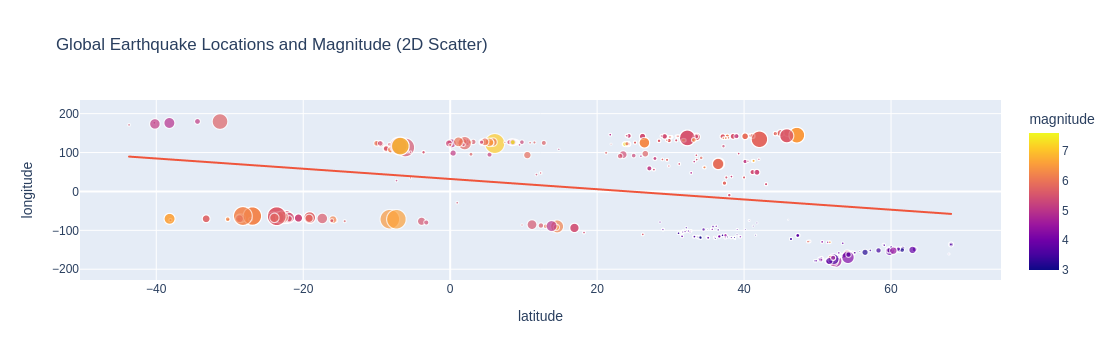

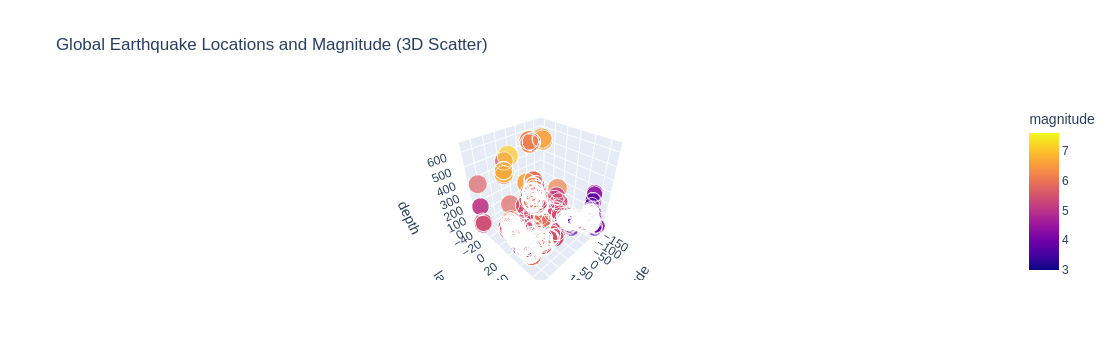

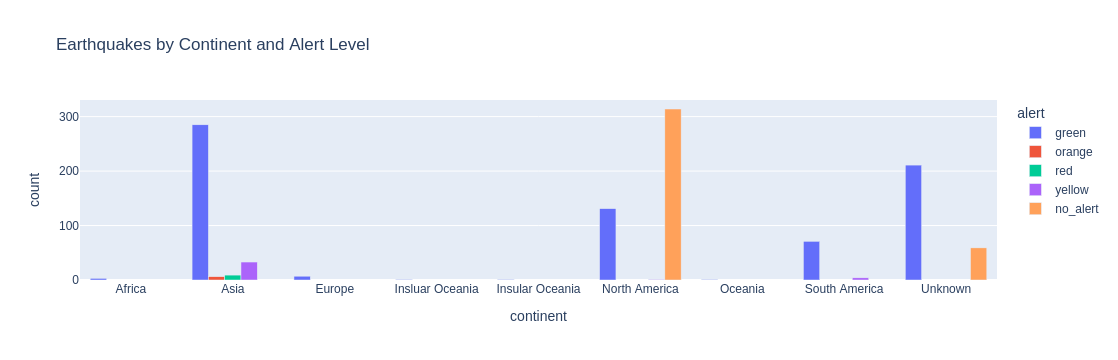

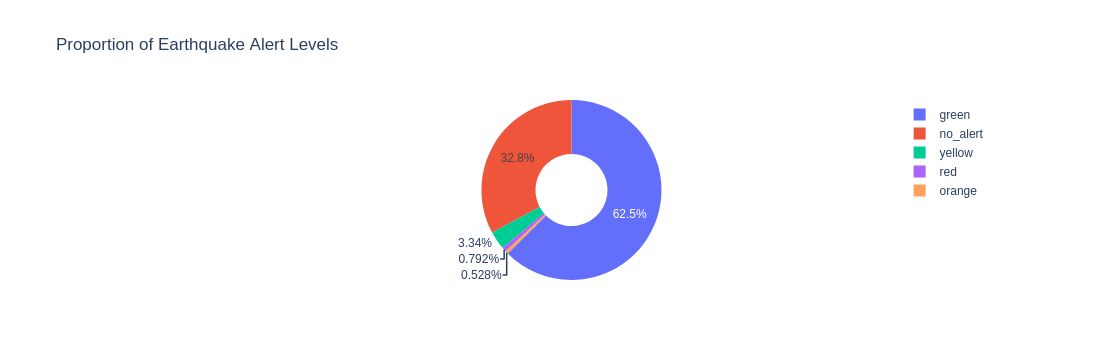

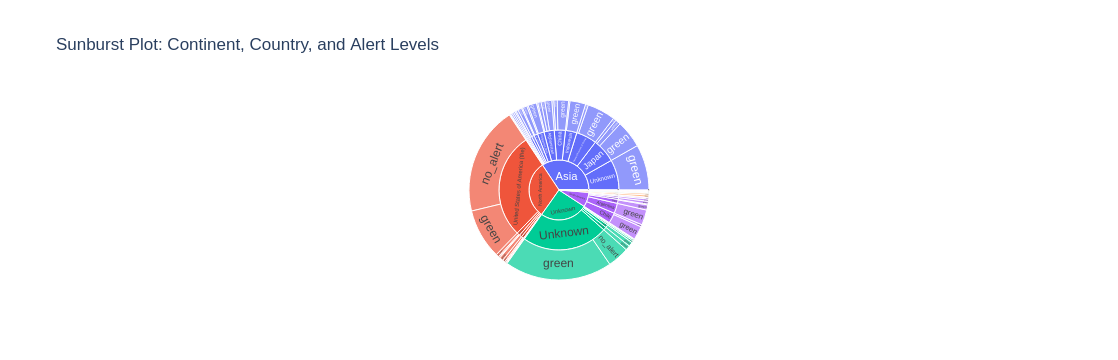

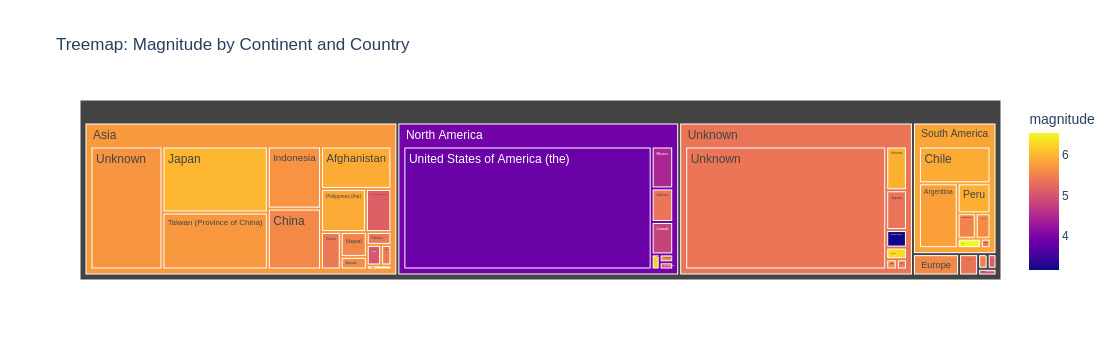

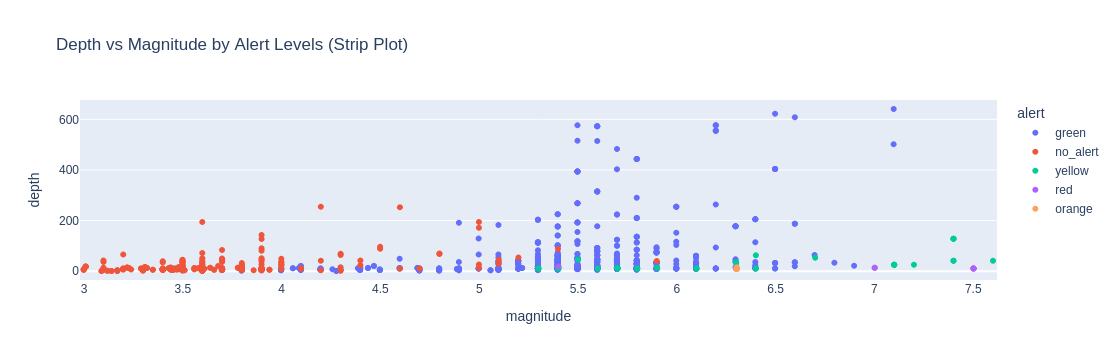

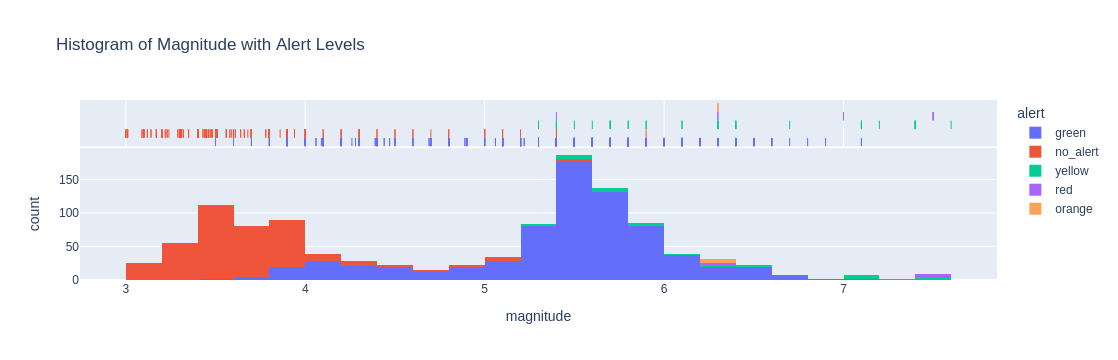

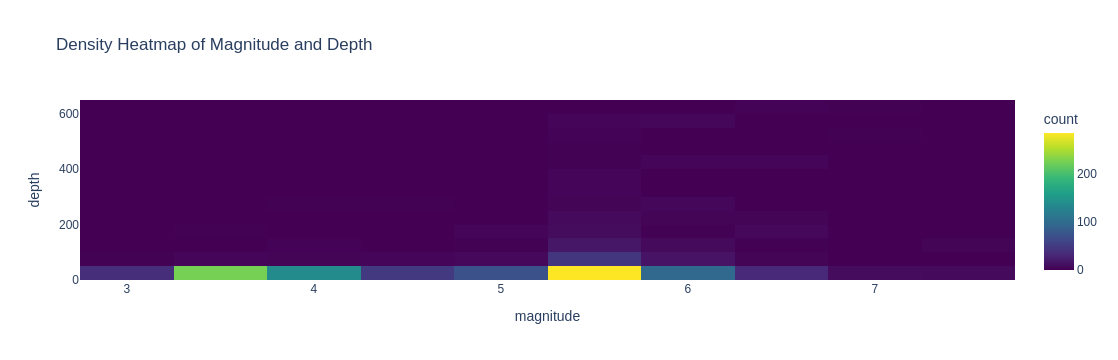

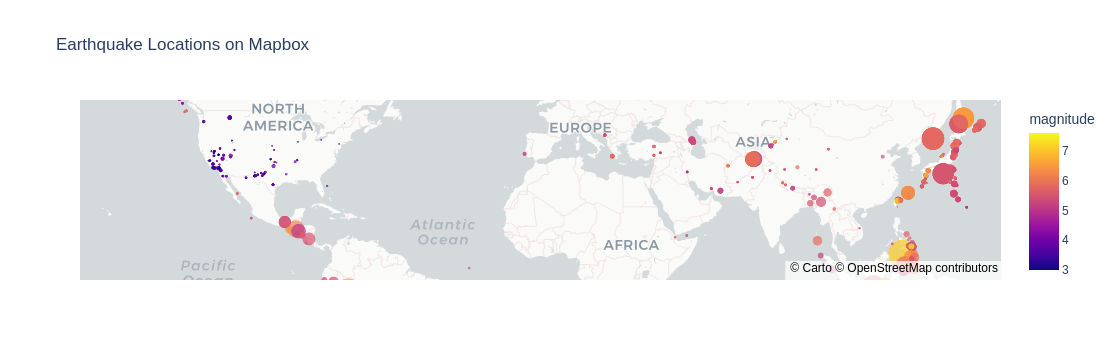

In [2]:
# Visualization of earthquakes

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
earthquakes_df = pd.read_csv('/home/avgenius/Downloads/earthquakes.csv')

# Check for negative values in the 'depth' column
print(f"Minimum depth value: {earthquakes_df['depth'].min()}")

# If there are negative values, add an offset to make all values positive
if earthquakes_df['depth'].min() < 0:
    earthquakes_df['depth'] += abs(earthquakes_df['depth'].min()) + 1  # Add offset to ensure all values are positive

# Scale 'depth' values for marker size
scaler = MinMaxScaler(feature_range=(5, 20))  # Set marker sizes between 5 and 20
earthquakes_df['scaled_depth'] = scaler.fit_transform(earthquakes_df[['depth']])

# Fill missing data for visualizations
earthquakes_df['continent'] = earthquakes_df['continent'].fillna('Unknown')
earthquakes_df['country'] = earthquakes_df['country'].fillna('Unknown')
earthquakes_df['alert'] = earthquakes_df['alert'].fillna('no_alert')

# Scatter Plot: 2D with trendline and additional properties
fig_scatter = px.scatter(
    earthquakes_df, 
    x='latitude', y='longitude', 
    color='magnitude', 
    size='depth', 
    hover_data=['place', 'tsunami', 'alert'],
    title="Global Earthquake Locations and Magnitude (2D Scatter)",
    trendline='ols'
)
fig_scatter.show()

# Scatter Plot: 3D
fig_scatter_3d = px.scatter_3d(
    earthquakes_df,
    x='longitude', y='latitude', z='depth',
    color='magnitude',
    size='magnitude',
    hover_data=['place', 'alert', 'tsunami'],
    title="Global Earthquake Locations and Magnitude (3D Scatter)"
)
fig_scatter_3d.show()

# Bar Plot: Grouped by Continent and Alert
fig_bar = px.bar(
    earthquakes_df.groupby(['continent', 'alert']).size().reset_index(name='count'),
    x='continent', y='count',
    color='alert', barmode='group',
    title="Earthquakes by Continent and Alert Level"
)
fig_bar.show()

# Pie Plot: Proportion of Alerts
fig_pie = px.pie(
    earthquakes_df,
    names='alert',
    title="Proportion of Earthquake Alert Levels",
    hole=0.4  # Donut-style pie chart
)
fig_pie.show()

# Sunburst Plot: Hierarchical View of Continents, Countries, and Alerts
fig_sunburst = px.sunburst(
    earthquakes_df,
    path=['continent', 'country', 'alert'],
    values='magnitude',
    title="Sunburst Plot: Continent, Country, and Alert Levels"
)
fig_sunburst.show()

# Treemap Plot: Hierarchical Magnitude by Continent and Country
fig_treemap = px.treemap(
    earthquakes_df,
    path=['continent', 'country'],
    values='magnitude',
    color='magnitude',
    title="Treemap: Magnitude by Continent and Country"
)
fig_treemap.show()

# Strip Plot: Depth by Magnitude
fig_strip = px.strip(
    earthquakes_df,
    x='magnitude', y='depth',
    color='alert',
    hover_data=['place', 'country'],
    title="Depth vs Magnitude by Alert Levels (Strip Plot)"
)
fig_strip.show()

# Histogram Plot: Magnitude Distribution
fig_hist = px.histogram(
    earthquakes_df,
    x='magnitude', color='alert',
    marginal='rug',  # Add rug plot for better visualization
    title="Histogram of Magnitude with Alert Levels"
)
fig_hist.show()

# Density Heatmap Plot: Magnitude and Depth
fig_density_heatmap = px.density_heatmap(
    earthquakes_df,
    x='magnitude', y='depth',
    color_continuous_scale='Viridis',
    title="Density Heatmap of Magnitude and Depth"
)
fig_density_heatmap.show()

# Scatter Mapbox: Earthquake Locations on Map
fig_mapbox = px.scatter_mapbox(
    earthquakes_df,
    lat='latitude', lon='longitude',
    color='magnitude', size='depth',
    hover_name='place', hover_data=['alert', 'tsunami'],
    title="Earthquake Locations on Mapbox",
    mapbox_style='carto-positron',
    zoom=1
)

fig_mapbox.show()

Explaind Variance Ratio : [0.326571   0.13209783 0.10369266 0.07579194]
Cumulative Explained Variance : [0.326571   0.45866883 0.56236149 0.63815343]

Before SMOTE:
alert_encoded
0    863
3     34
2      8
1      4
Name: count, dtype: int64

After SMOTE:
alert_encoded
0    863
3    863
2    863
1    863
Name: count, dtype: int64

### Logistic Regression - Predicing Earthquake Alert Grade ###
Accuracy:  0.9211
Classification Report:
              precision    recall  f1-score   support

       green       1.00      0.92      0.96       221
      orange       0.22      1.00      0.36         2
         red       1.00      1.00      1.00         1
      yellow       0.23      0.75      0.35         4

    accuracy                           0.92       228
   macro avg       0.61      0.92      0.67       228
weighted avg       0.97      0.92      0.94       228



/tmp/ipykernel_9885/2091205642.py:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





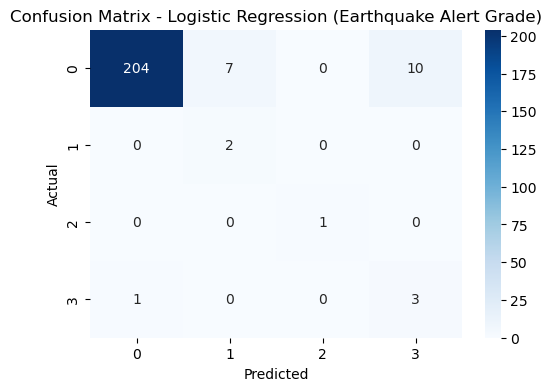


### Random Forest - Predicing Earthquake Alert Grade ###
Accuracy:  0.9912
Classification Report:
              precision    recall  f1-score   support

       green       1.00      1.00      1.00       221
      orange       1.00      1.00      1.00         2
         red       1.00      1.00      1.00         1
      yellow       0.75      0.75      0.75         4

    accuracy                           0.99       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.99      0.99      0.99       228



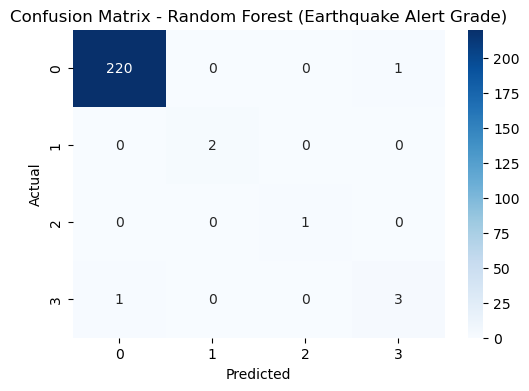


### KNN - Predicing Earthquake Alert Grade ###
Accuracy:  0.9342
Classification Report:
              precision    recall  f1-score   support

       green       1.00      0.93      0.96       221
      orange       1.00      1.00      1.00         2
         red       1.00      1.00      1.00         1
      yellow       0.21      1.00      0.35         4

    accuracy                           0.93       228
   macro avg       0.80      0.98      0.83       228
weighted avg       0.99      0.93      0.95       228



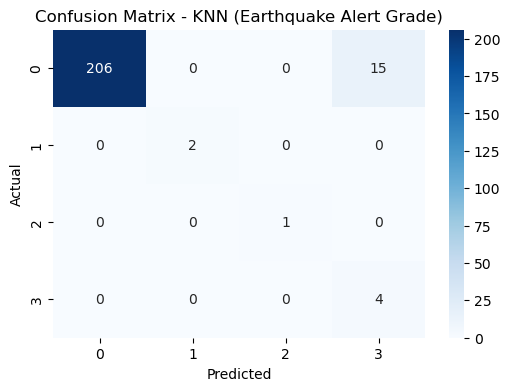


### SVM - Predicing Earthquake Alert Grade ###
Accuracy:  0.9342
Classification Report:
              precision    recall  f1-score   support

       green       1.00      0.93      0.96       221
      orange       1.00      1.00      1.00         2
         red       1.00      1.00      1.00         1
      yellow       0.21      1.00      0.35         4

    accuracy                           0.93       228
   macro avg       0.80      0.98      0.83       228
weighted avg       0.99      0.93      0.95       228



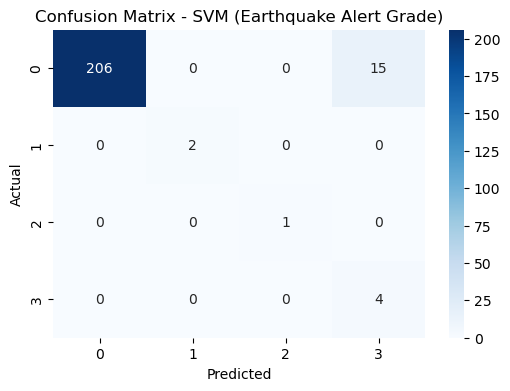

In [4]:
# Earthquakes alert prediction(4-grades: green, yellow, orange, red)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

earthquakes_df = pd.read_csv('/home/avgenius/Downloads/earthquakes.csv')

# Null data preprocessing and  magnitude prediction_01 : mode(최빈값), Logstic Regression
earthquakes_df['alert'].fillna(earthquakes_df['alert'].mode()[0], inplace=True)

# Label encoding(earthquakes alert: green, yellow, orange, red)
label_encoder = LabelEncoder()
earthquakes_df['alert_encoded']=label_encoder.fit_transform(earthquakes_df['alert'])

# Defining features and target
features = ['magnitude', 'felt', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 
            'rms', 'gap', 'depth', 'latitude', 'longitude', 'distanceKM' ,'timezone']
X = earthquakes_df[features]
y_alert = earthquakes_df['alert_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

print('Explaind Variance Ratio :', pca.explained_variance_ratio_)
print('Cumulative Explained Variance :', np.cumsum(pca.explained_variance_ratio_))

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_alert, test_size=0.2, random_state=42)

# Solving alert's data imbalance : Over-sampling
smote = SMOTE(k_neighbors=3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# checking class ratio
print('\nBefore SMOTE:')
print(y_train.value_counts())
print('\nAfter SMOTE:')
print(pd.Series(y_train_smote).value_counts())

pred_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', random_state=42)
}

def train_and_evaluate(pred_models, X_train, X_test, y_train, y_test, target_name, class_labels):
    for model_name, model in pred_models.items():
        print(f'\n### {model_name} - Predicing {target_name} ###')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        con_mat = confusion_matrix(y_test, y_pred)

        print(f'Accuracy: {accuracy : .4f}')
        print('Classification Report:')
        print(classification_report(y_test, y_pred, target_names=class_labels))

        plt.figure(figsize=(6,4))
        sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.title(f'Confusion Matrix - {model_name} ({target_name})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

# Earthquakes alert prediction
train_and_evaluate(pred_models, X_train_smote, X_test, y_train_smote, y_test, 
                   target_name='Earthquake Alert Grade', class_labels=label_encoder.classes_)

Before SMOTE:
tsunami
0    855
1     54
Name: count, dtype: int64

After SMOTE:
tsunami
0    855
1    855
Name: count, dtype: int64

### Logistic Regression - Predicting Tsunami ###
Accuracy: 0.8070
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       214
           1       0.16      0.50      0.24        14

    accuracy                           0.81       228
   macro avg       0.56      0.66      0.57       228
weighted avg       0.91      0.81      0.85       228



/tmp/ipykernel_9885/514208116.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





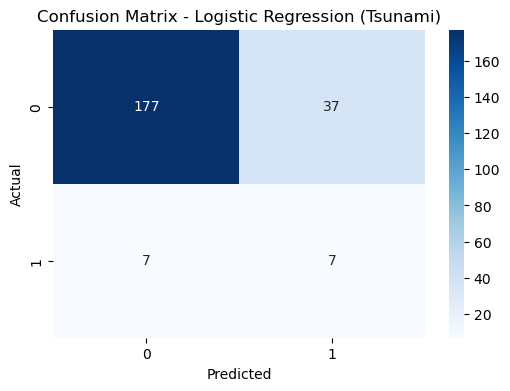


### Random Forest - Predicting Tsunami ###
Accuracy: 0.9605
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       214
           1       0.69      0.64      0.67        14

    accuracy                           0.96       228
   macro avg       0.83      0.81      0.82       228
weighted avg       0.96      0.96      0.96       228



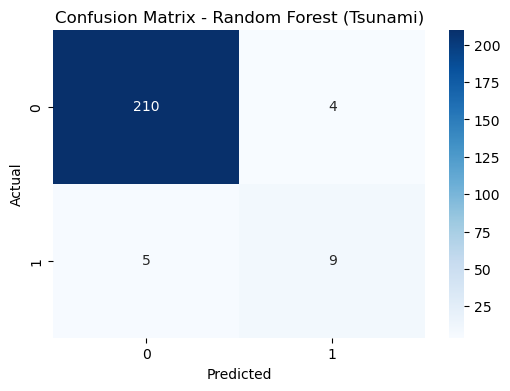


### KNN - Predicting Tsunami ###
Accuracy: 0.9123
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       214
           1       0.40      0.86      0.55        14

    accuracy                           0.91       228
   macro avg       0.69      0.89      0.75       228
weighted avg       0.95      0.91      0.93       228



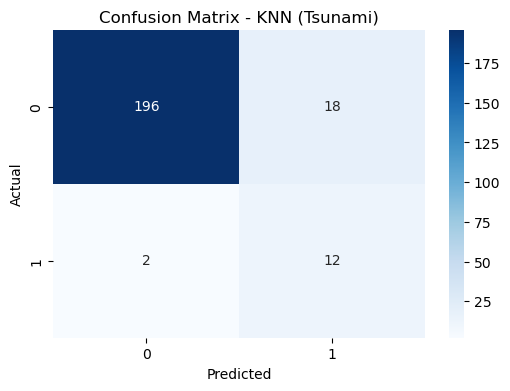


### SVM - Predicting Tsunami ###
Accuracy: 0.7982
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       214
           1       0.15      0.50      0.23        14

    accuracy                           0.80       228
   macro avg       0.56      0.66      0.56       228
weighted avg       0.91      0.80      0.84       228



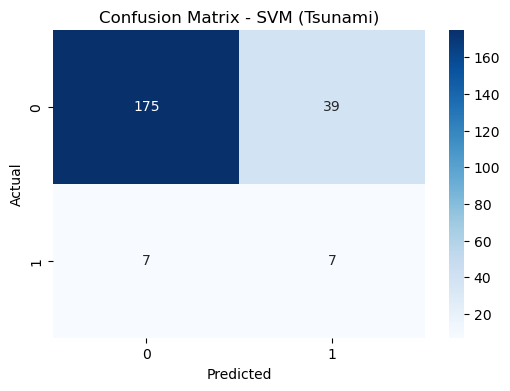

In [5]:
# Tsunami prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

earthquakes_df = pd.read_csv('/home/avgenius/Downloads/earthquakes.csv')

# Null value preprocessing
earthquakes_df['alert'].fillna(earthquakes_df['alert'].mode()[0], inplace=True)

# Defining features and target
features = ['magnitude', 'felt', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'rms', 'gap', 
            'depth', 'latitude', 'longitude', 'distanceKM', 'timezone']
X = earthquakes_df[features]
y_tsunami = earthquakes_df['tsunami']

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_tsunami, test_size=0.2, random_state=42)

# Solving tsunami's data imbalance : Over-sampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# checking class ratio
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42)
}

# function : model train and evaluation
def train_and_evaluate(models, X_train, X_test, y_train, y_test, target_name):
    for model_name, model in models.items():
        print(f"\n### {model_name} - Predicting {target_name} ###")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # performance evaluation
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix 시각화
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.title(f"Confusion Matrix - {model_name} ({target_name})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

# Tsunami prediction
train_and_evaluate(models, X_train_smote, X_test, y_train_smote, y_test, target_name="Tsunami")